# Hacks for 2.3
>Getting this file to show in fastpages has been a pain II
- title: 2.3 Hacks
- layout: post
- author: Evan Aparri
- toc: true
- categories: []
- type: ap
- week: 25

## **Pandas**


A dataset of [Fortune 1000](https://www.kaggle.com/winston56/fortune-500-data-2021) from Kaggle datasets to explore pandas library will be used.

The Fortune 1000 dataset is from the Fortune website. It contains U.S. company data for the year 2021. The dataset is 1000 rows and 18 columns.

Features:
* Company - values are the name of the company
Rank - The 2021 rank established by Fortune (1-1000)
* Rank Change - The change in the rank from 2020 to 2021. There is only a rank change listed if the company is currently in the top 500 and was previously in the top 500.
* Revenue - Revenue of each company in millions. This is the criteria used to rank each company.
* Profit - Profit of each company in millions.
Num. of Employees - The number of employees each company employs.
* Sector - The sector of the market the company operates in.
* City - The city where the company's headquarters is located.
* State - The state where the company's headquarters is located
* Newcomer - Indicates whether or not the company is new to the top Fortune 500 ("yes" or "no"). No value will be listed for companies outside of the top 500.
* CEO Founder - Indicates whether the CEO of the company is also the founder ("yes" or "no").
* CEO Woman - Indicates whether the CEO of the company is a woman ("yes" or "no").
* Profitable - Indicates whether the company is profitable or not ("yes" or "no").
* Prev. Rank - The 2020 rank of the company, as established by Fortune. There will only be previous rank data for the top 500 companies.
* CEO - The name of the CEO of the company
* Website - The url of the company website
* Ticker - The stock ticker symbol of public companies. Some rows will have empty values because the company is a private corporation.
* Market Cap - The market cap (or value) of the company in millions. Some rows will have empty values because the company is private. Market valuations were determined on January 20, 2021.

In [1]:
# download data file into Google Colab server
!wget -nc /content/ https://datasets21.s3-us-west-1.amazonaws.com/Fortune_1000.csv

/content/: Scheme missing.
File ‘Fortune_1000.csv’ already there; not retrieving.



In [1]:
# import data by pandas.read_csv
import pandas as pd
f1000 = pd.read_csv('Fortune_1000.csv',index_col=0)

In [23]:
# explore the dataset
f1000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Walmart to Liberty Oilfield Services
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1000 non-null   int64  
 1   rank_change        1000 non-null   float64
 2   revenue            1000 non-null   float64
 3   profit             998 non-null    float64
 4   num. of employees  1000 non-null   int64  
 5   sector             1000 non-null   object 
 6   city               1000 non-null   object 
 7   state              1000 non-null   object 
 8   newcomer           500 non-null    object 
 9   ceo_founder        1000 non-null   object 
 10  ceo_woman          1000 non-null   object 
 11  profitable         1000 non-null   object 
 12  prev_rank          1000 non-null   object 
 13  CEO                992 non-null    object 
 14  Website            1000 non-null   object 
 15  Ticker             938 non-null    object 
 16  Ma

In [24]:
f1000.head(3)

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
company,,,,,,,,,,,,,,,,,
Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923


### Select data using those labels

Because the axes in pandas have labels, I can select data using those labels — unlike in NumPy, where I needed to know the exact index location. To do this, I can use the `DataFrame.loc[]` attribute. The syntax for `DataFrame.loc[]` is:

`df.loc[row_label, column_label]`

#### Select Single Column

In [25]:
companies = f1000.loc[:,'profit']
print(companies)
print(type(f1000))
print(type(companies))

company
Walmart                      14881.0
Amazon                       11588.0
Exxon Mobil                  14340.0
Apple                        55256.0
CVS Health                    6634.0
                              ...   
Mr. Cooper Group               274.0
Herc Holdings                   47.5
Healthpeak Properties           45.5
SPX FLOW                       -95.1
Liberty Oilfield Services       39.0
Name: profit, Length: 1000, dtype: float64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Series object

In [26]:
#print(f1000['revenue'])
print(f1000.loc[:,'revenue'])

print(f1000.loc['Apple','revenue'])

company
Walmart                      523964.0
Amazon                       280522.0
Exxon Mobil                  264938.0
Apple                        260174.0
CVS Health                   256776.0
                               ...   
Mr. Cooper Group               2007.0
Herc Holdings                  1999.0
Healthpeak Properties          1997.4
SPX FLOW                       1996.3
Liberty Oilfield Services      1990.3
Name: revenue, Length: 1000, dtype: float64
260174.0


#### Select multiple columns
* List of columns
* Slice of columns

In [27]:
#f1000.loc[:,['rank','revenue', 'sector']]
f1000[['rank','revenue']]

#f1000.loc[:,'rank':'sector']

,rank,revenue
company,,
Walmart,1,523964.0
Amazon,2,280522.0
Exxon Mobil,3,264938.0
Apple,4,260174.0
CVS Health,5,256776.0
...,...,...
Mr. Cooper Group,996,2007.0
Herc Holdings,997,1999.0
Healthpeak Properties,998,1997.4


#### Select rows by labels


In [28]:
#f1000.loc['Walmart']
f1000.loc[['Amazon', 'Apple']]
#f1000.loc['Amazon':'Apple']

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
company,,,,,,,,,,,,,,,,,
Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176


### Series.value_counts() method
`Series.value_counts()` method. This method displays each unique non-null value in a column and their counts in order.

In [29]:
sector_value_counts = f1000['sector'].value_counts(ascending=True)
print(sector_value_counts)

Food & Drug Stores                10
Telecommunications                11
Apparel                           16
Motor Vehicles & Parts            22
Aerospace & Defense               22
Media                             25
Household Products                26
Hotels, Restaurants & Leisure     27
Chemicals                         27
Engineering & Construction        30
Wholesalers                       35
Food, Beverages & Tobacco         37
Transportation                    38
Materials                         46
Industrials                       50
Business Services                 52
Health Care                       71
Retailing                         75
Technology                       109
Energy                           109
Financials                       162
Name: sector, dtype: int64


In [30]:
f1000['sector'].value_counts().loc['Technology']

109

In [40]:
# find out the biggest increase and biggest decrease in rank
#f1000['rank_change'].max()
#f1000['rank_change'].min()
f1000['rank_change'].describe()

count    1000.000000
mean        0.426000
std        22.424169
min      -186.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       224.000000
Name: rank_change, dtype: float64

In [32]:
f1000['rank_change'].value_counts()

 0.0     544
-1.0      22
-2.0      18
 2.0      16
 4.0      15
        ... 
-30.0      1
-43.0      1
 98.0      1
 86.0      1
-87.0      1
Name: rank_change, Length: 118, dtype: int64

*Example*:

List out the numbers of companies in the Fortune 1000 of the top 3 states

In [33]:
top_3_states = f1000['state'].value_counts().head(3)
print(top_3_states)

CA    121
TX     95
NY     89
Name: state, dtype: int64


*Example:*

find the company that employs the most people in California in the dataset.

I can use the `DataFrame.sort_values()` method to sort the rows on the employees column

In [34]:
f1000[f1000['state']=='CA'].sort_values('num. of employees',ascending=False).head(1)

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
company,,,,,,,,,,,,,,,,,
Wells Fargo,30,-1.0,103915.0,19549.0,259800,Financials,San Francisco,CA,no,no,no,yes,29.0,Charles W. Scharf,https://www.wellsfargo.com,WFC,99941


*Exercise:*

find the unique list of states in the dataset

To identify the unique states, I can use the `Series.unique()` method. This method returns an array of unique values from any series. 


In [35]:
states = f1000['state'].unique()
print(states)

['AR' 'WA' 'TX' 'CA' 'RI' 'NE' 'MN' 'PA' 'MI' 'CT' 'OH' 'NY' 'IL' 'DC'
 'NC' 'GA' 'IN' 'MA' 'NJ' 'VA' 'MO' 'TN' 'KY' 'ID' 'MD' 'OR' 'FL' 'WI'
 'CO' 'OK' 'LA' 'DE' 'AZ' 'IA' 'NV' 'KS' 'AL' 'SC' 'ND' 'NH' 'MS' 'PR'
 'UT' 'HI' 'VT' 'ME']


***Demonstration:***

I'm going to produce the following dictionary of the top employer in each state:

1. create an empty dictionary, `top_employer_by_state` to store the results of the exercise.

2. Use the `Series.unique()` method to create an array of unique values from the state column

3. Use a for loop to iterate over the array unique states. In each iteration:
* Select only the rows that have a state name equal to the current iteration.
* Use `DataFrame.sort_values()` to sort those rows by the `num. of employees` column in descending order.
* Select the first row from the sorted dataframe and convert the Dataframe into a series using `DataFrame.squeeze()`
* Extract the company name from the index label company by `Series.name`.
* Assign the results to the top_employer_by_state dictionary, using the state name as the key, and the company name as the value.

In [2]:
top_exmployer_by_state = {}
states = f1000['state'].unique()

for state in states:
  selected_companies = f1000[f1000['state']==state]
  top_exmployer_by_state[state] = selected_companies.sort_values('num. of employees', ascending=False).head(1).squeeze().name
  

In [37]:
for key in top_exmployer_by_state:
  print(key, ' : ', top_exmployer_by_state[key])

AR  :  Walmart
WA  :  Amazon
TX  :  Yum China Holdings
CA  :  Wells Fargo
RI  :  CVS Health
NE  :  Berkshire Hathaway
MN  :  Target
PA  :  Aramark
MI  :  Ford Motor
CT  :  XPO Logistics
OH  :  Kroger
NY  :  IBM
IL  :  Walgreens Boots Alliance
DC  :  Danaher
NC  :  Lowe&#8217;s
GA  :  Home Depot
IN  :  Anthem
MA  :  TJX
NJ  :  Cognizant Technology Solutions
VA  :  Hilton Worldwide Holdings
MO  :  Emerson Electric
TN  :  FedEx
KY  :  Humana
ID  :  Albertsons
MD  :  Marriott International
OR  :  Nike
FL  :  Publix Super Markets
WI  :  Kohl&#8217;s
CO  :  VF
OK  :  Helmerich & Payne
LA  :  Lumen Technologies
DE  :  DuPont
AZ  :  Republic Services
IA  :  Casey&#8217;s General Stores
NV  :  MGM Resorts International
KS  :  Yellow
AL  :  Encompass Health
SC  :  Sonoco Products
ND  :  MDU Resources Group
NH  :  PC Connection
MS  :  Sanderson Farms
PR  :  Popular
UT  :  Nu Skin Enterprises
HI  :  Hawaiian Holdings
VT  :  NLV Financial
ME  :  IDEXX Laboratories


## Reference

[pandas API reference](https://pandas.pydata.org/docs/reference/index.html)

[pandas vs. NumPy](https://www.javatpoint.com/pandas-vs-numpy#:~:text=The%20Pandas%20module%20mainly%20works,works%20with%20the%20numerical%20data.&text=NumPy%20library%20provides%20objects%20for,memory%20as%20compared%20to%20Pandas.)

## CollegeBoard MCQ

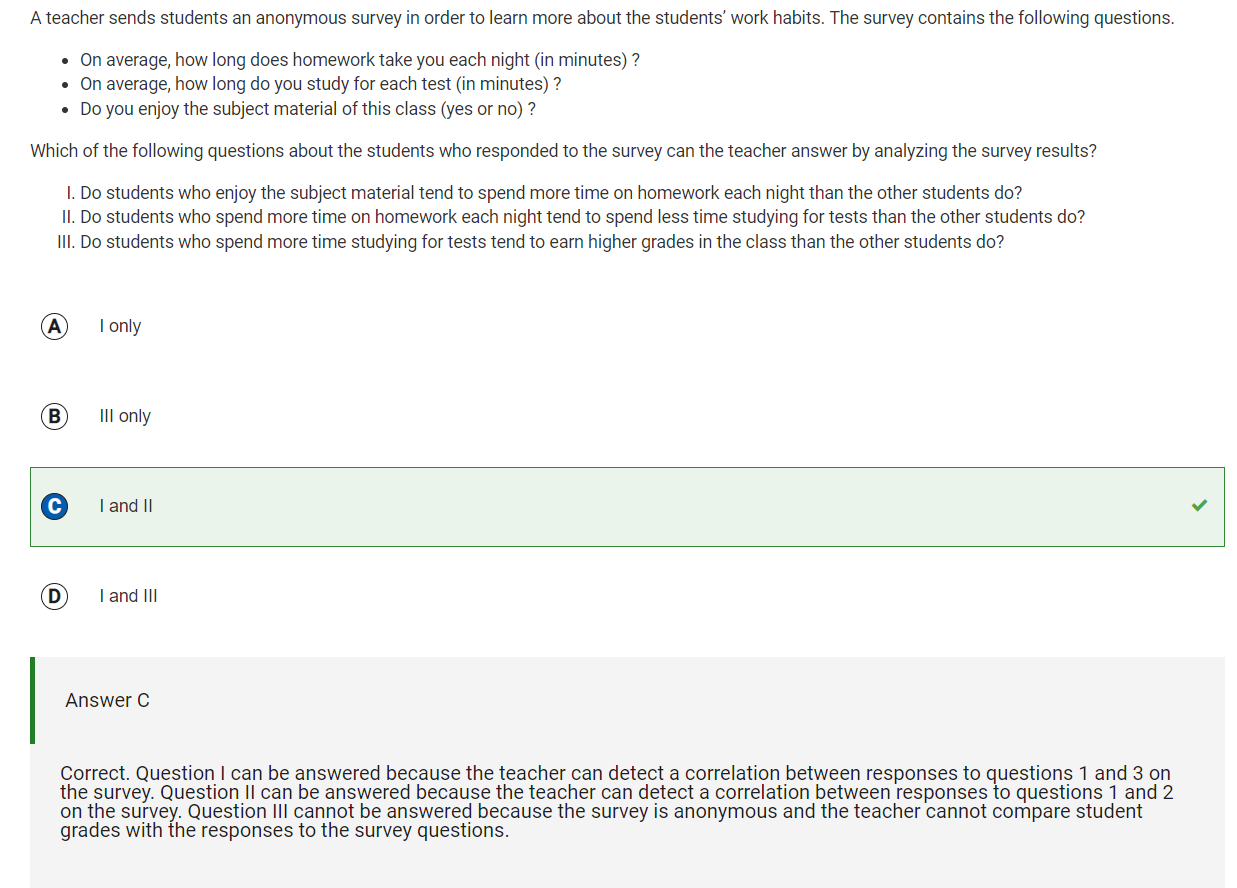

In [3]:
from IPython.display import Image, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "College Board", 'label': "Unit 2.2 Question", 'file': "2_3MCQ.png"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))


# Run this as standalone tester to see sample data printed in Jupyter terminal
if __name__ == "__main__":
    # print parameter supplied image

    default_images = image_data()
    image_display(default_images)